# 1. 포켓몬 분류
* Train: https://www.kaggle.com/datasets/thedagger/pokemon-generation-one
* Validation: https://www.kaggle.com/hlrhegemony/pokemon-image-dataset

In [1]:
import os

In [2]:
os.environ['KAGGLE_USERNAME'] = 'seoholeee'
os.environ['KAGGLE_KEY'] = '3f2424ea6aa59a6df97dadbf6b666dce'

In [3]:
!kaggle datasets download -d thedagger/pokemon-generation-one

 99% 2.13G/2.15G [00:19<00:00, 269MB/s]
100% 2.15G/2.15G [00:19<00:00, 117MB/s]


In [4]:
!unzip -q pokemon-generation-one.zip

In [5]:
!kaggle datasets download -d hlrhegemony/pokemon-image-dataset

 69% 40.0M/57.9M [00:00<00:00, 197MB/s]
100% 57.9M/57.9M [00:00<00:00, 206MB/s]


In [6]:
!unzip -q pokemon-image-dataset.zip

In [7]:
!mv dataset train

In [8]:
!rm -rf train/dataset # 데이터 삭제

In [9]:
!mv images validation


In [10]:
train_labels = os.listdir('train')
print(train_labels)
print(len(train_labels))

['Kangaskhan', 'Zapdos', 'Aerodactyl', 'Alakazam', 'Wigglytuff', 'Charmander', 'Tangela', 'Seel', 'Sandshrew', 'Nidoqueen', 'Seaking', 'Raticate', 'Exeggcute', 'Fearow', 'Magmar', 'Kabutops', 'Tentacool', 'Growlithe', 'Gyarados', 'Oddish', 'Kadabra', 'Rapidash', 'Venonat', 'Electabuzz', 'Primeape', 'Cloyster', 'Jynx', 'Machamp', 'Gengar', 'Seadra', 'Dragonair', 'Rhyhorn', 'Pinsir', 'Flareon', 'Graveler', 'Geodude', 'Krabby', 'Chansey', 'Machoke', 'Zubat', 'Snorlax', 'Venusaur', 'Clefairy', 'Vaporeon', 'Weezing', 'Raichu', 'Pikachu', 'Parasect', 'Porygon', 'Hitmonchan', 'Drowzee', 'Psyduck', 'Golduck', 'Nidorina', 'Arcanine', 'Diglett', 'Omanyte', 'Paras', 'Staryu', 'Hitmonlee', 'Kabuto', 'Golem', 'Ponyta', 'Arbok', 'Slowbro', 'Magneton', 'Sandslash', 'Scyther', 'Doduo', 'Machop', 'Farfetchd', 'Butterfree', 'Poliwhirl', 'Mewtwo', 'Gastly', 'Vileplume', 'Metapod', 'Tauros', 'Lickitung', 'Poliwrath', 'Slowpoke', 'Nidorino', 'Abra', 'Victreebel', 'Voltorb', 'Ninetales', 'Exeggutor', 'Bulba

In [11]:
val_labels = os.listdir('validation')
print(val_labels)
print(len(val_labels))

['Crawdaunt', 'Shelmet', 'Spewpa', 'Blacephalon', 'Bronzong', 'Smoochum', 'Ralts', 'Porygon-Z', 'Yanmega', 'Lucario', 'Latios', 'Skarmory', 'Cufant', 'Rolycoly', 'Drilbur', 'Kricketune', 'Whirlipede', 'Zebstrika', 'Torkoal', 'Volbeat', 'Kangaskhan', 'Rillaboom', 'Lileep', 'Zapdos', 'Milotic', 'Giratina', 'Mareanie', 'Nihilego', 'NidoranтЩВ', 'Landorus', 'Zweilous', 'Aerodactyl', 'Alakazam', 'Regice', 'Sudowoodo', 'Servine', 'Wigglytuff', 'Jumpluff', 'Charmander', 'Pichu', 'Poochyena', 'Tangela', 'Seel', 'Grimmsnarl', 'Clamperl', 'Sobble', 'Wishiwashi', 'Sandshrew', 'Monferno', 'Corphish', 'Medicham', 'Gothitelle', 'Mudsdale', 'Aron', 'Espurr', 'Luvdisc', 'Zigzagoon', 'Serperior', 'Appletun', 'Nidoqueen', 'Seaking', 'Raticate', 'Simisear', 'Pineco', 'Cosmoem', 'Exeggcute', 'Cubchoo', 'Aurorus', 'Claydol', 'Fearow', 'Phione', 'Bounsweet', 'Pancham', 'Nincada', 'Gardevoir', 'Togetic', 'Barbaracle', 'Magmar', 'Petilil', 'Luxray', 'Pikipek', 'Litleo', 'Genesect', 'Tapu Fini', 'Kabutops', 'S

In [12]:
import shutil

In [13]:
for val_label in val_labels:
  if val_label not in train_labels:
    shutil.rmtree(os.path.join('validation', val_label))

In [14]:
val_labels = os.listdir('validation')
len(val_labels)

147

In [15]:
for train_label in train_labels:
  if train_label not in val_labels:
    print(train_label)

Farfetchd
MrMime


In [16]:
for train_label in train_labels:
  if train_label not in val_labels:
    print(train_label)
    os.makedirs(os.path.join('validation', train_label), exist_ok=True)

Farfetchd
MrMime


In [17]:
val_labels = os.listdir('validation')
len(val_labels)

149

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [20]:
data_transforms = {
    'train' : transforms.Compose([
        transforms.Resize((224, 224)),
        # 각도, 찌그러뜨림, 크기
        transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
        # 수평으로 뒤집기
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'validation': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
}

In [22]:
image_datasets = {
    'train': datasets.ImageFolder('train', data_transforms['train']),
    'validation': datasets.ImageFolder('validation', data_transforms['validation'])
}

In [23]:
dataloaders = {
    'train': DataLoader(
        image_datasets['train'],
        batch_size=32,
        shuffle=True
    ),
    'validation': DataLoader(
        image_datasets['validation'],
        batch_size=32,
        shuffle=False
    )
}

In [24]:
print(len(image_datasets['train']), len(image_datasets['validation']))

10657 661


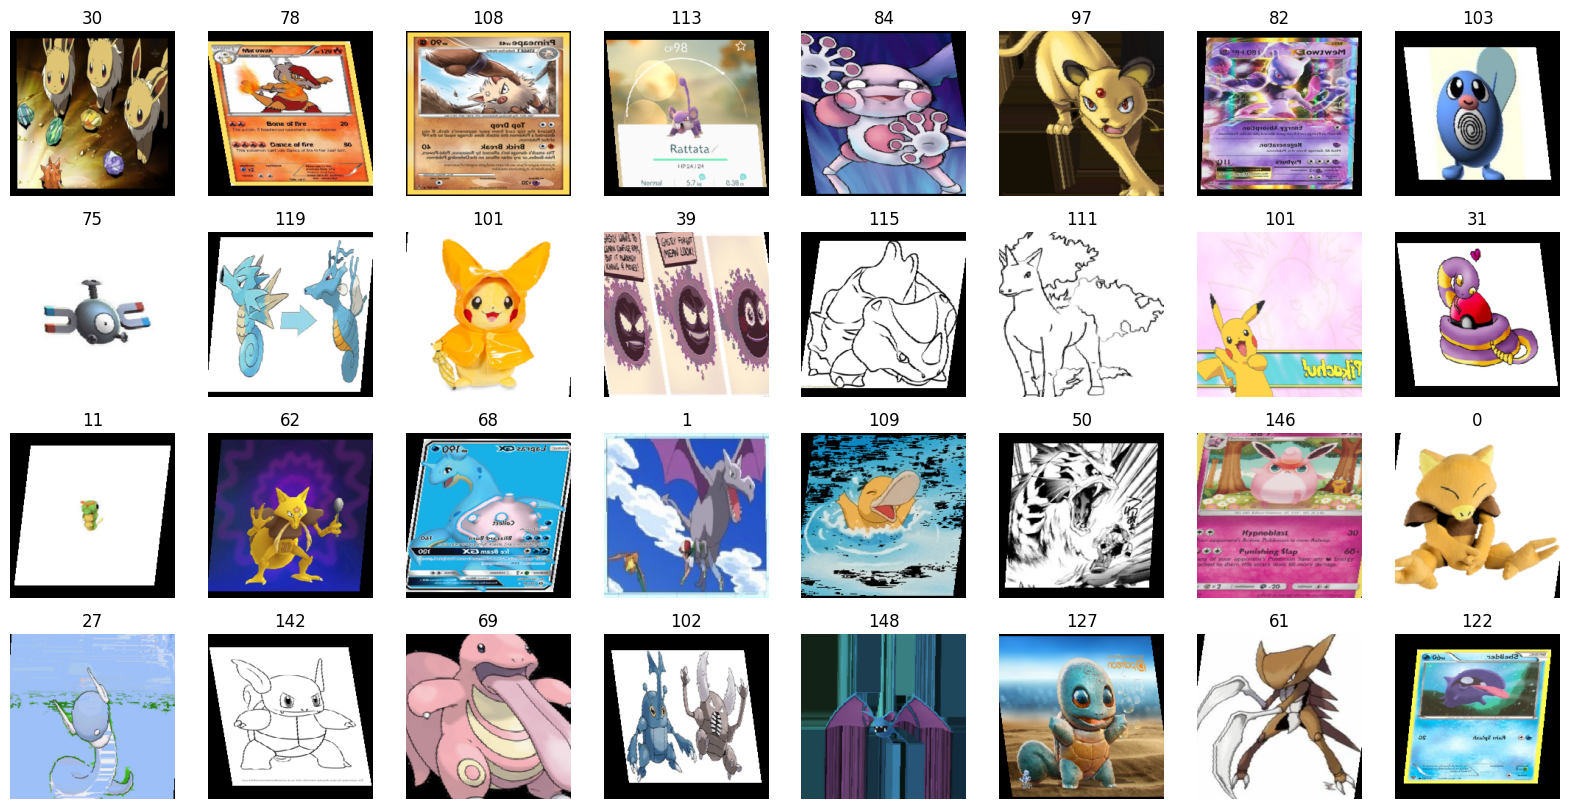

In [25]:
imgs, labels = next(iter(dataloaders['train']))

fig, axes = plt.subplots(4, 8, figsize=(20, 10))

for ax, img, label in zip(axes.flatten(), imgs, labels):
    ax.imshow(img.permute(1, 2, 0)) # (3, 224, 224) -> (224, 224, 3)
    ax.set_title(label.item())
    ax.axis('off')

In [26]:
image_datasets['train'].classes[101]

'Pikachu'

In [27]:
from torchvision.models import efficientnet_b4, EfficientNet_B4_Weights
from torchvision.models._api import WeightsEnum
from torch.hub import load_state_dict_from_url

In [28]:
# efficientnet_b4 의 문제해결을 위한 코드

def get_state_dict(self, *args, **kwargs):
    kwargs.pop("check_hash")
    return load_state_dict_from_url(self.url, *args, **kwargs)

WeightsEnum.get_state_dict = get_state_dict

In [29]:
# 사전 학습된 EfficientNetB4 모델
model = efficientnet_b4(weights=EfficientNet_B4_Weights.IMAGENET1K_V1)
model = efficientnet_b4(weights='DEFAULT').to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b4_rwightman-7eb33cd5.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b4_rwightman-7eb33cd5.pth
100%|██████████| 74.5M/74.5M [00:00<00:00, 99.3MB/s]


In [30]:
model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [31]:
for param in model.parameters():
  param.requires_grad = False

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)
print(model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [32]:
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)

epochs = 10

for epoch in range(epochs):
    for phase in ['train', 'validation']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        sum_losses = 0
        sum_accs = 0

        for x_batch, y_batch in dataloaders[phase]:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            y_pred = model(x_batch)
            loss = nn.CrossEntropyLoss()(y_pred, y_batch)

            if phase == 'train':
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            sum_losses = sum_losses + loss

            y_prob = nn.Softmax(1)(y_pred)
            y_pred_index = torch.argmax(y_pred, axis=1)
            acc = (y_batch == y_pred_index).float().sum() / len(y_batch) * 100
            sum_accs = sum_accs + acc

        avg_loss = sum_losses / len(dataloaders[phase])
        avg_acc = sum_accs / len(dataloaders[phase])
        print(f'{phase:10s}: Epoch {epoch+1:4d}/{epochs} Loss: {avg_loss:.4f} Accuracy: {avg_acc:.2f}%')


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train     : Epoch    1/10 Loss: 3.3718 Accuracy: 29.24%
validation: Epoch    1/10 Loss: 1.4824 Accuracy: 71.70%
train     : Epoch    2/10 Loss: 1.8202 Accuracy: 56.70%
validation: Epoch    2/10 Loss: 0.9145 Accuracy: 78.78%
train     : Epoch    3/10 Loss: 1.4632 Accuracy: 64.07%
validation: Epoch    3/10 Loss: 0.7308 Accuracy: 83.39%
train     : Epoch    4/10 Loss: 1.2957 Accuracy: 67.69%
validation: Epoch    4/10 Loss: 0.6392 Accuracy: 85.03%
train     : Epoch    5/10 Loss: 1.3214 Accuracy: 67.92%
validation: Epoch    5/10 Loss: 0.5860 Accuracy: 85.93%
train     : Epoch    6/10 Loss: 1.0642 Accuracy: 72.15%
validation: Epoch    6/10 Loss: 0.6138 Accuracy: 83.91%
train     : Epoch    7/10 Loss: 1.0146 Accuracy: 74.71%
validation: Epoch    7/10 Loss: 0.5899 Accuracy: 85.03%
train     : Epoch    8/10 Loss: 0.8958 Accuracy: 76.18%
validation: Epoch    8/10 Loss: 0.5822 Accuracy: 83.84%
train     : Epoch    9/10 Loss: 0.8798 Accuracy: 76.38%
validation: Epoch    9/10 Loss: 0.5222 Accuracy:

In [33]:
# 학습된 모델 파일 저장
torch.save(model.state_dict(), 'model.pth') # model.h5



In [34]:
model = models.efficientnet_b4().to(device)

model.classifier = nn.Sequential(
    nn.Linear(1792, 512),
    nn.ReLU(),
    nn.Linear(512, 149)
).to(device)

print(model)



EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

In [35]:
model.load_state_dict(torch.load('model.pth'))

<All keys matched successfully>

In [36]:
model.eval()

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=48, bias=False)
            (1): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(48, 12, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(12, 48, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActiv

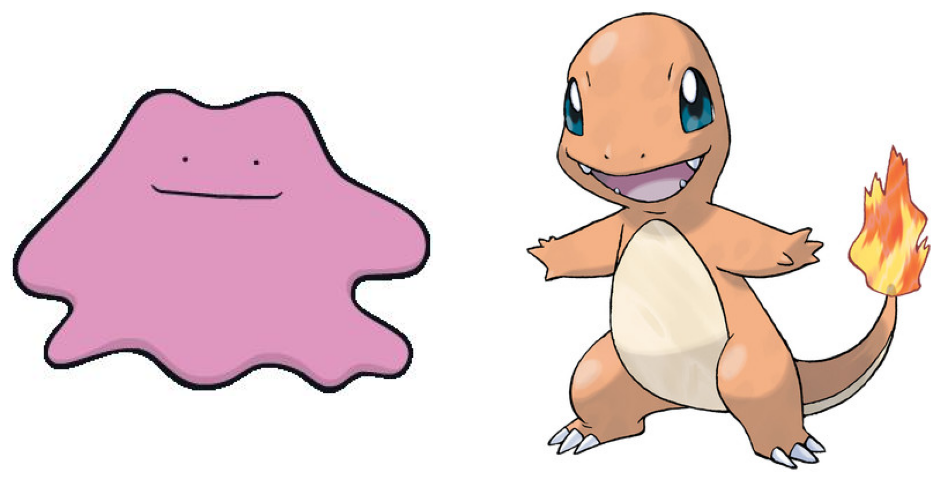

In [37]:
from PIL import Image

img1 = Image.open('./validation/Ditto/3.jpg')
img2 = Image.open('./validation/Charmander/0.jpg')

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img1)
axes[0].axis('off')
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()

In [39]:
img1_input = data_transforms['validation'](img1)
img2_input = data_transforms['validation'](img2)
print(img1_input.shape)
print(img2_input.shape) # [3, 224, 224]


torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [40]:
test_batch = torch.stack([img1_input, img2_input])
test_batch = test_batch.to(device)
test_batch.shape # [2, 3, 224, 224]

torch.Size([2, 3, 224, 224])

In [41]:
y_pred = model(test_batch)
y_pred

tensor([[ -5.4866, -12.5537,  -8.3185, -10.7973, -14.0429, -18.2381, -14.0428,
          -8.0377, -15.3215,  -7.1361, -16.4260, -10.7265,  -5.6240, -12.1242,
          -8.6946,  -9.5055,  -7.2611,  -4.5935,  -8.2668,  -7.7608,  -8.4959,
          -7.9463,   2.3045, -16.3781, -12.6817, -16.5195, -13.1790, -10.1736,
          -4.0454,  -9.0429, -15.6654,  -7.4730, -13.1880, -13.2840, -10.7287,
         -13.2623, -11.1002, -13.6083, -10.1632,  -7.1648,  -7.5134,  -8.0886,
         -13.0154,  -7.9759,  -7.5200, -10.5571,  -9.6476,  -7.0837,  -2.4790,
         -11.2197, -15.8406,  -6.1052,  -9.7203, -10.6999, -12.9385,  -7.7163,
         -11.6540,  -8.0364, -15.2340,  -9.8081, -10.5743, -12.1953,  -9.3801,
         -12.6703,  -9.3782, -11.8334,  -5.0927,  -8.4069, -10.6107, -10.4499,
         -10.4484, -11.6472,  -8.0671, -13.5941, -12.0322, -12.9369, -17.3132,
         -10.0490,  -5.5754, -12.5643,  -5.7855,  -9.4209, -11.5350, -12.6746,
          -6.2459,  -3.1095, -10.3117,  -8.9333,  -9

In [42]:
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[4.0531e-04, 3.4563e-07, 2.3873e-05, 2.0017e-06, 7.7960e-08, 1.1746e-09,
         7.7961e-08, 3.1612e-05, 2.1705e-08, 7.7880e-05, 7.1923e-09, 2.1485e-06,
         3.5329e-04, 5.3106e-07, 1.6391e-05, 7.2850e-06, 6.8730e-05, 9.9008e-04,
         2.5141e-05, 4.1699e-05, 1.9993e-05, 3.4638e-05, 9.8051e-01, 7.5456e-09,
         3.0409e-07, 6.5502e-09, 1.8494e-07, 3.7347e-06, 1.7129e-03, 1.1570e-05,
         1.5389e-08, 5.5608e-05, 1.8328e-07, 1.6650e-07, 2.1438e-06, 1.7016e-07,
         1.4787e-06, 1.2039e-07, 3.7737e-06, 7.5679e-05, 5.3404e-05, 3.0044e-05,
         2.1781e-07, 3.3630e-05, 5.3051e-05, 2.5453e-06, 6.3196e-06, 8.2075e-05,
         8.2030e-03, 1.3121e-06, 1.2915e-08, 2.1836e-04, 5.8766e-06, 2.2065e-06,
         2.3522e-07, 4.3596e-05, 8.4986e-07, 3.1654e-05, 2.3690e-08, 5.3828e-06,
         2.5016e-06, 4.9461e-07, 8.2578e-06, 3.0759e-07, 8.2739e-06, 7.1031e-07,
         6.0102e-04, 2.1854e-05, 2.4123e-06, 2.8332e-06, 2.8375e-06, 8.5566e-07,
         3.0697e-05, 1.2211e

In [43]:
probs, idx = torch.topk(y_prob, k=3)
print(probs)
print(idx)

tensor([[9.8051e-01, 8.2030e-03, 4.3670e-03],
        [9.9757e-01, 2.1195e-03, 6.3542e-05]], device='cuda:0',
       grad_fn=<TopkBackward0>)
tensor([[ 22,  48,  85],
        [ 14, 127,  15]], device='cuda:0')


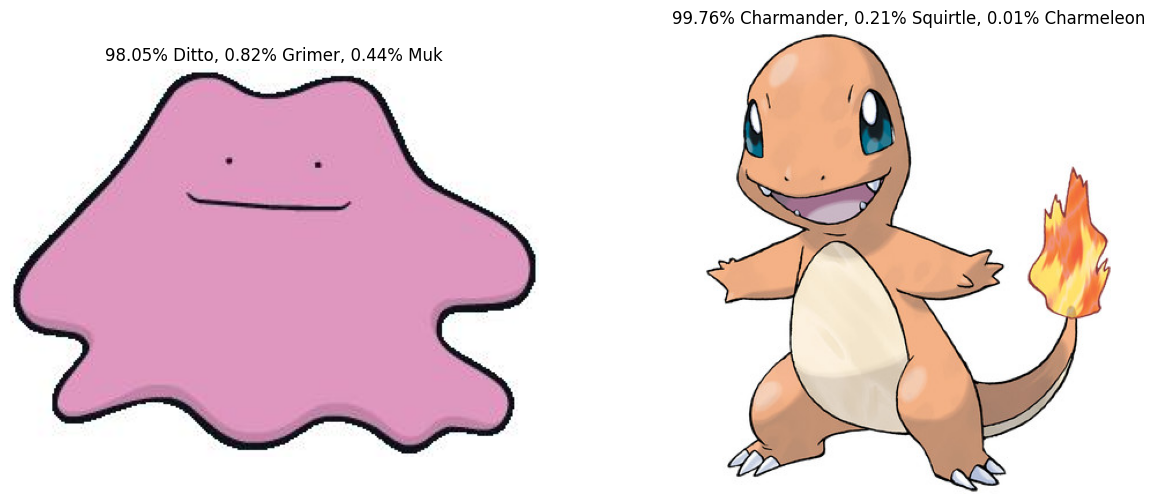

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[0, 0] * 100,
    image_datasets['validation'].classes[idx[0, 0]],
    probs[0, 1] * 100,
    image_datasets['validation'].classes[idx[0, 1]],
    probs[0, 2] * 100,
    image_datasets['validation'].classes[idx[0, 2]]
))
axes[0].imshow(img1)
axes[0].axis('off')

axes[1].set_title('{:.2f}% {}, {:.2f}% {}, {:.2f}% {}'.format(
    probs[1, 0] * 100,
    image_datasets['validation'].classes[idx[1, 0]],
    probs[1, 1] * 100,
    image_datasets['validation'].classes[idx[1, 1]],
    probs[1, 2] * 100,
    image_datasets['validation'].classes[idx[1, 2]]
))
axes[1].imshow(img2)
axes[1].axis('off')
plt.show()